Missing values before handling:
 student_id       0
math_score       1
english_score    1
attendance       0
dtype: int64

Missing values after handling:
 student_id       0
math_score       0
english_score    0
attendance       0
dtype: int64

Any outliers?
 False

Data shape after outlier removal: (20, 4)

Original skewness of math_score: -0.27273909922728723
Transformed skewness of log_math_score: -0.650915462359726


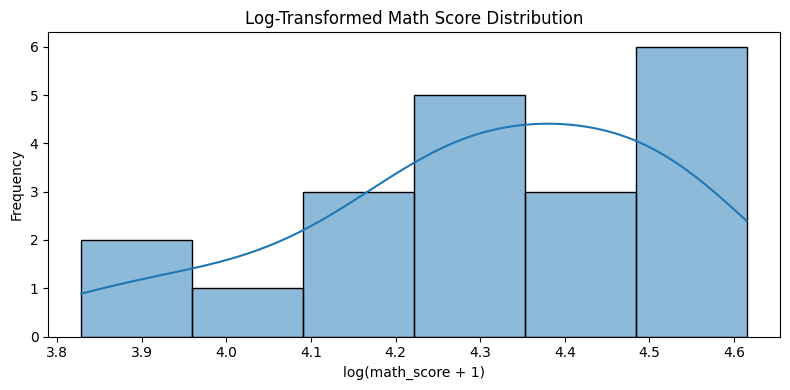

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew

# Create a dummy academic performance dataset
data = {
    'student_id': range(1, 21),
    'math_score': [78, 85, 95, 65, 89, 55, 67, 45, 92, 70, 88, 75, 68, 90, 73, 80, 60, 50, 100, np.nan],
    'english_score': [82, 79, 91, 64, np.nan, 52, 70, 43, 88, 72, 85, 78, 66, 87, 71, 76, 61, 49, 95, 90],
    'attendance': [90, 85, 95, 80, 87, 60, 73, 50, 96, 88, 85, 77, 70, 93, 78, 83, 69, 65, 99, 92]
}

df = pd.DataFrame(data)

# -----------------------------------
# 1. Handle missing values
# -----------------------------------
print("Missing values before handling:\n", df.isnull().sum())

# Fill missing values using mean
df['math_score'] = df['math_score'].fillna(df['math_score'].mean())
df['english_score'] = df['english_score'].fillna(df['english_score'].mean())


print("\nMissing values after handling:\n", df.isnull().sum())

# -----------------------------------
# 2. Detect and handle outliers
# -----------------------------------
# Calculate Z-scores for numeric columns
z_scores = np.abs(zscore(df[['math_score', 'english_score', 'attendance']]))
outliers = (z_scores > 3)

print("\nAny outliers?\n", outliers.any())

# Remove rows with any outlier
df_clean = df[(z_scores < 3).all(axis=1)]
print("\nData shape after outlier removal:", df_clean.shape)

# -----------------------------------
# 3. Variable transformation (log to reduce skewness)
# -----------------------------------
original_skew = skew(df_clean['math_score'])
print("\nOriginal skewness of math_score:", original_skew)

# Log transform
df_clean['log_math_score'] = np.log1p(df_clean['math_score'])

transformed_skew = skew(df_clean['log_math_score'])
print("Transformed skewness of log_math_score:", transformed_skew)

# Plot the result
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['log_math_score'], kde=True)
plt.title("Log-Transformed Math Score Distribution")
plt.xlabel("log(math_score + 1)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
